In [90]:
# import packages
import os
import pandas as pd
import matplotlib.pyplot as plt


In [67]:
# set directory
main_directory = os.getcwd().strip('notebooks')

In [68]:
# read in cleaned crime data
crime_data = pd.read_csv(main_directory +'data/curated/crime/LGA_crime_clean.csv')

In [69]:
# view df
crime_data

,Unnamed: 0,Year,LGA code,Offence Count,"per_100,000_alleged_off",Alleged Offender Incidents,"per_100,000_crim_incidents",Incidents Recorded,"per_100,000_fam_incidents",Victim Reports,"per_100,000_recorded_off",Year ending,Police Region,Family Incidents,"per_100,000_vic_reports",total crime number
0,0,2022.0,Banyule,7191.0,5604.2,2547.0,1985.0,5244.0,4086.9,2826.0,2202.4,March,1 North West Metro,1185.0,923.5,18993.0
1,1,2022.0,Brimbank,16839.0,8468.6,5062.0,2545.8,12330.0,6201.0,7056.0,3548.6,March,1 North West Metro,2776.0,1396.1,44063.0
2,2,2022.0,Darebin,12424.0,7703.4,4084.0,2532.2,9276.0,5751.5,5197.0,3222.3,March,1 North West Metro,1610.0,998.3,32591.0
3,3,2022.0,Hobsons Bay,5884.0,6147.4,2005.0,2094.8,4599.0,4804.9,2679.0,2798.9,March,1 North West Metro,1031.0,1077.2,16198.0
4,4,2022.0,Hume,17870.0,7208.5,5915.0,2386.0,12196.0,4919.7,7056.0,2846.3,March,1 North West Metro,3850.0,1553.0,46887.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,390,2018.0,Surf Coast,1142.0,3540.9,352.0,1091.4,952.0,2951.8,657.0,2037.1,March,4 Western,177.0,548.8,3280.0
391,391,2018.0,Swan Hill,2466.0,11878.6,1078.0,5192.7,1752.0,8439.3,924.0,4450.9,March,4 Western,609.0,2933.5,6829.0
392,392,2018.0,Warrnambool,3555.0,10197.1,1597.0,4580.8,2707.0,7764.7,1230.0,3528.1,March,4 Western,627.0,1798.5,9716.0
393,393,2018.0,West Wimmera,161.0,4168.8,60.0,1553.6,114.0,2951.8,70.0,1812.5,March,4 Western,41.0,1061.6,446.0


In [106]:
# generate pivot for totals in each LGA per year
pivot = crime_data.pivot(index = 'Year', columns = 'LGA code', values = 'total crime number')

In [234]:
list(pivot.columns)

[' Alpine',
 ' Ararat',
 ' Ballarat',
 ' Banyule',
 ' Bass Coast',
 ' Baw Baw',
 ' Bayside',
 ' Benalla',
 ' Boroondara',
 ' Brimbank',
 ' Buloke',
 ' Campaspe',
 ' Cardinia',
 ' Casey',
 ' Central Goldfields',
 ' Colac-Otway',
 ' Corangamite',
 ' Darebin',
 ' East Gippsland',
 ' Frankston',
 ' Gannawarra',
 ' Glen Eira',
 ' Glenelg',
 ' Golden Plains',
 ' Greater Bendigo',
 ' Greater Dandenong',
 ' Greater Geelong',
 ' Greater Shepparton',
 ' Hepburn',
 ' Hindmarsh',
 ' Hobsons Bay',
 ' Horsham',
 ' Hume',
 ' Indigo',
 ' Kingston',
 ' Knox',
 ' Latrobe',
 ' Loddon',
 ' Macedon Ranges',
 ' Manningham',
 ' Mansfield',
 ' Maribyrnong',
 ' Maroondah',
 ' Melbourne',
 ' Melton',
 ' Mildura',
 ' Mitchell',
 ' Moira',
 ' Monash',
 ' Moonee Valley',
 ' Moorabool',
 ' Moreland',
 ' Mornington Peninsula',
 ' Mount Alexander',
 ' Moyne',
 ' Murrindindi',
 ' Nillumbik',
 ' Northern Grampians',
 ' Port Phillip',
 ' Pyrenees',
 ' Queenscliffe',
 ' South Gippsland',
 ' Southern Grampians',
 ' Stonni

<AxesSubplot:title={'center':'Total crime number vs Year for LGAs in Victoria'}, xlabel='Year', ylabel='Crime number'>

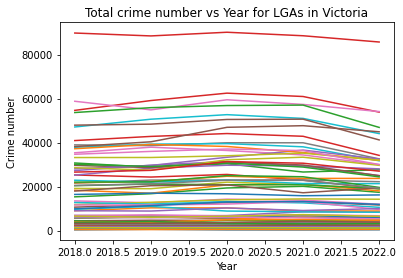

In [108]:
# look at how crime number  has changed over the years; it seems like it's pretty consistent across the years
pivot.plot(legend = False, title = 'Total crime number vs Year for LGAs in Victoria', xlabel = 'Year', ylabel = 'Crime number')

In [109]:
# how has total crime numbers changed over the years?
total = pd.DataFrame(crime_data.groupby('Year')['total crime number'].sum())

<AxesSubplot:xlabel='Year'>

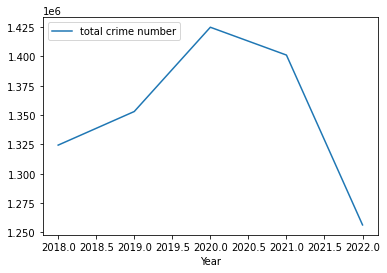

In [110]:
total.plot() # it sees that total criime number is decreasing in general

In [264]:
# read in LGA data for population
LGA_pop = pd.read_csv(main_directory + 'data/raw/population/LGA_POP.csv')


In [265]:
# make a new pivot of crime data to be merged with LGAs
pivot_transpose = crime_data.pivot(index = 'LGA code', columns = 'Year', values = 'total crime number')

In [266]:
# dont have 2022 data for pop, so drop that
pivot_transpose.drop(columns = [2022.0], inplace = True)

In [267]:
# make the LGA naming consistent and drop index
pivot_transpose.reset_index(inplace = True)

In [268]:
# only take relevant years
LGA_pop_recent_years = LGA_pop.loc[:,['Local Government Area','2018','2019','2020','2021']].rename(columns = {'Local Government Area':'LGA code'})

In [269]:
# convert LGA names to consistent format
LGA_pop_recent_years['LGA code']=LGA_pop_recent_years['LGA code'].str.replace('(Vic.)','')
LGA_pop_recent_years['LGA code']=LGA_pop_recent_years['LGA code'].str.strip('(-)')
LGA_pop_recent_years['LGA code']=LGA_pop_recent_years['LGA code'].str.strip()

/var/folders/jv/q8z94ls52bq_4hrt0x88rlb40000gn/T/ipykernel_36103/2624233201.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  LGA_pop_recent_years['LGA code']=LGA_pop_recent_years['LGA code'].str.replace('(Vic.)','')


In [270]:
#list(LGA_pop_recent_years['LGA code'])

In [271]:
# strip name white space and hyphens
pivot_transpose['LGA code'] = pivot_transpose['LGA code'].str.strip()
pivot_transpose['LGA code'] = pivot_transpose['LGA code'].str.replace('-',' ')

In [272]:
# merge population data with crime data
LGA_pop_recent_years.dropna(inplace = True)
merged_pop_crime = LGA_pop_recent_years.merge(pivot_transpose, how = 'right',on = 'LGA code')

In [273]:
# check if there is any unmatched data
merged_pop_crime[merged_pop_crime['2018'].isnull()]

,LGA code,2018,2019,2020,2021,2018.0,2019.0,2020.0,2021.0


In [282]:
merged_pop_crime=merged_pop_crime.rename(columns = {'2018': '2018 population','2019': '2019 population','2020': '2020 population',
                                   '2021': '2021 population', 2018:'2018 crime', 2019:'2019 crime', 2020:'2020 crime', 2021:'2021 crime'})

In [289]:
# calculate rates (crime)
years = ['2018', '2019','2020','2021']

# iterate through the years and find the ratios
for year in years:
    merged_pop_crime[year+ ' ratio'] =  merged_pop_crime[year+' crime']/merged_pop_crime[year + ' population']


In [311]:
# write a new dataframe for plotting
merged_pop_crime_plot = pd.DataFrame()
crime_ratio_list = []
year_list= []
lga = []
for i in range(len(merged_pop_crime)): 
    for year in years:
        year_list.append(year)
        crime_ratio_list.append(merged_pop_crime.loc[[i],[year + ' ratio']].values[0][0])
        lga.append(merged_pop_crime.loc[[i],['LGA code']].values[0][0])
merged_pop_crime_plot['Year'] = year_list
merged_pop_crime_plot['LGA code']=lga
merged_pop_crime_plot['crime_ratio_list']=crime_ratio_list

In [314]:
# create pivot for plotting
plot_pivot_merge = merged_pop_crime_plot.pivot(index = 'Year', columns = 'LGA code', values  = 'crime_ratio_list')

<AxesSubplot:title={'center':'Total crime ratio vs Year for LGAs in Victoria'}, xlabel='Year', ylabel='Crime ratio'>

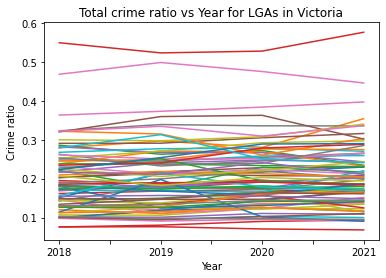

In [318]:
# examine how crime ratios have changed over the years, and plot this
plot_pivot_merge.plot(legend = False, title = 'Total crime ratio vs Year for LGAs in Victoria', xlabel = 'Year', ylabel = 'Crime ratio')

In [323]:
# generate transposed pivot
plot_pivot_merge_T = merged_pop_crime_plot.pivot(index = 'LGA code', columns = 'Year', values  = 'crime_ratio_list')

In [325]:
# get the average ratio change per year
plot_pivot_merge_T['Average_ratio_change']= (plot_pivot_merge_T['2020'] - plot_pivot_merge_T['2019'] +
                                             plot_pivot_merge_T['2019'] - plot_pivot_merge_T['2018'] +
                                             plot_pivot_merge_T['2021']-plot_pivot_merge_T['2020'])/3

In [327]:
plot_pivot_merge_T.reset_index(inplace = True) # reset index

In [334]:
# generate synthetic ratios for 2022 - 2025 as for predictions
# create new df
predicted_crime_rates = pd.DataFrame()
predicted_crime_rates['LGA code'] = plot_pivot_merge_T['LGA code']
years_future = ['2022','2023','2024','2025']
for year in years_future:
    year_list_rates = []
    for i in range(len(plot_pivot_merge_T)):
        year_list_rates.append(plot_pivot_merge_T.loc[[i],[str(int(year) - 1)]].values[0][0] +plot_pivot_merge_T.loc[[i],['Average_ratio_change']].values[0][0])
    predicted_crime_rates[year] = year_list_rates 
    plot_pivot_merge_T[year] = year_list_rates 


In [335]:
predicted_crime_rates

,LGA code,2022,2023,2024,2025
0,Alpine,0.122317,0.128261,0.134206,0.140150
1,Ararat,0.379012,0.403993,0.428974,0.453956
2,Ballarat,0.217388,0.200308,0.183228,0.166147
3,Banyule,0.174872,0.169836,0.164800,0.159764
4,Bass Coast,0.215506,0.221617,0.227729,0.233840
...,...,...,...,...,...
74,Wodonga,0.209260,0.207303,0.205345,0.203388
75,Wyndham,0.165013,0.169083,0.173153,0.177224
76,Yarra,0.408340,0.419578,0.430815,0.442053
77,Yarra Ranges,0.149918,0.154905,0.159892,0.164878
